# Table of Contents
1) Sequence Manipulation

2) Protein Synthesis

3) DNA Composition - GC and AT content

4) Sequence Alignment

5) Difference between Sequence Similarity and Sequence Identity

6) Checking Similarity Using Distance

7) Checking for Similarity using DotPlot

8) Working with Biological Data File Formats

9) Working with 3D structures

10) Visualizing 3D structures

11) BLAST


In [2]:
import Bio

In [6]:
from Bio.Seq import Seq
#dir(Seq)

In [27]:
seq1 = ("ATGATCTCGTAA")

# Create a simple DNA sequence
dna = Seq(seq1)

#Create a simple RNA sequence
rna = Seq(seq1.replace('T','U'))

#Create a simple protein
protein_a = Seq("MIT")

# 1) Sequence Manipulation



In [41]:
#Length of sequence
len(dna)

#Slicing to obtain first 3 nucleotides
dna[0:3]

#Reverse a sequence
dna[::-1]

#Combining sequences
seq2 = Seq("ATGATCTCGTGG")
dna[0:6] + seq2 # ATGATCAATGATCTCGTAA - adds first 6 nucleotides of dna to seq 2 

#Find number of a particular nucleotide within sequence
dna.count("G") #4

#Find number of codons occurring in a particular sequence(3N)
dna.count("ATG") #1

#Find first position/location of a nucleotide using FIND from LEFT
#Recall python 0 based indexing
dna.find("G") #2

#First first position/location of a nucleotide using FIND from RIGHT
dna.rfind("G") #8

#Find location/index of a nucleotide using INDEX
dna.index("G") #2 



2

### Plot of frequency of nucleotides


In [42]:
import matplotlib.pyplot as plt
from collections import Counter

<BarContainer object of 4 artists>

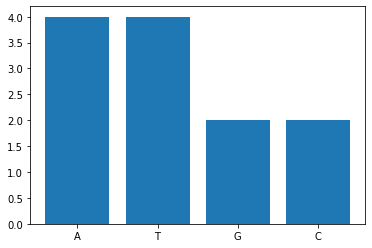

In [44]:
dna_freq = Counter(dna)

plt.bar(dna_freq.keys(), dna_freq.values())

# 2) Protein Synthesis

In [ ]:
from Bio.Seq import Seq

In [60]:
dna_seq = Seq("ATGATCTCGTAA") #read in 3' -> 5' direction
len(dna_seq) #12

#Complement of dna - Adenine and Thymine form double hydrogen bond pairs whereas Guanine and Cytosine form triple hydrogen bond pairs. 
dna_seq.complement() #('TACTAGAGCATT')

#Reverse Compliment of dna (reading the complement strand of dna(lagging)) read in 5' -> 3' direction
dna_seq.reverse_complement() #('TTACGAGATCAT')
#dna_seq.complement()[::-1]


##### PROTEIN SYNTHESIS #####

#Transcription: DNA to mRNA - step simply replaces occurrences of T with U in dna_seq
mRNA = dna_seq.transcribe()
mRNA #AUGAUCUCGUAA

#Translation: mRNA to amino acid sequence
mRNA.translate() #('MIS*') where * is codon stop symbol and all of M I and S represent an amino acid

#Can directly form amino acid from dna_seq
dna_seq.transcribe().translate() #('MIS*') 

#Create custom Codon Stop Symbol
mRNA.translate(stop_symbol="@")


Seq('MIS*')

In [62]:
#Back Transcription: Convert mRNA to DNA
mRNA.back_transcribe() #('ATGATCTCGTAA')

Seq('ATGATCTCGTAA')

In [ ]:
#Convert Amino Acid to 3 Letter (seq3) or 1 Letter(seq1)
from Bio.SeqUtils import seq3,seq1

In [68]:
amino_acid = dna_seq.translate()
seq3(amino_acid) #MetIleSerTer
seq1("MetIleSerTer") #'MIS*'

'MIS*'

In [70]:
#Get codon table for all of the 20 amino acids
from Bio.Data import CodonTable
#dir(CodonTable)

In [74]:
#DNA CodonTable
print(CodonTable.unambiguous_dna_by_name["Standard"])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [75]:
#RNA CodonTable
print(CodonTable.unambiguous_rna_by_name["Standard"])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

# 3) DNA composition - AT or GC content

In [76]:
from Bio.SeqUtils import GC
#In Polymerase chain reaction expts, Gc content of short oligonucleotides(primers) used to print annealing temperature to template DNA.
# Higher GC Content = higher MP = more stable = complicates PCR amplification due to difficulty in designing primer long enough to provide specificity 

### GC content

In [136]:
dna_seq = Seq("ATGATCTCGTAA") #read in 3' -> 5' direction

#GC content built in function
GC(dna_seq) #does not matter if lowercase or uppercase

#Custom functions to find GC content. Require to ensure dna sequence gets used as uppercase

#1st method
gc_content_first_method = lambda x: (x.upper().count('G') + x.upper().count('C')) / (len(dna_seq)* 1/100)
#print(gc_content_first_method(dna_seq)) #66.7%

#2nd method
def gc_content_second_method(seq):
    gc = [base for base in seq.upper() if base in "GC"]
    return float(len(gc)) / len(dna_seq) * 100
#print(gc_content_second_method(dna_seq)) #33.3%


33.333333333333336


### AT Content

In [110]:
#AT content has no built in function so we have to create one
def at_content(seq):
    return float(seq.upper().count('A') + seq.upper().count('T')) / len(dna_seq) * 100

at_content(dna_seq)

66.66666666666666

### Determining Stability of DNA using its GC content where higher GC = higher Melting Point due to the stronger triple bonds


In [122]:
from Bio.SeqUtils import MeltingTemp as mt

In [115]:
#Check mp with Wallace
mt.Tm_Wallace(dna_seq)

#Check mp with GC content
mt.Tm_GC(dna_seq) #23.32155893208184 pretty low because low GC content!

23.32155893208184

### GC Skew - check when nucleotide (G,C) are over or under abundant in a particular location of dna or rna


In [117]:
from Bio.SeqUtils import GC_skew,GC123,xGC_skew

In [120]:
#GC count on 1st,2nd,3rd position
GC123(dna_seq) #(33.333333333333336, 0.0, 25.0, 75.0)

#GC skew for finding leading and lagging strands
GC_skew(dna_seq) #[0.0] no skew with 100 windows preset

GC_skew(dna_seq, window = 10) #[0.0, 0.0]

#Plot GC_skew
# xGC_skew(dna_seq) REQUIRES TKINTER!!!

[0.0, 0.0]

### Subsequences - Searching for a DNA subsequence in sequence. Returns list of [subsequence,positions]

In [123]:
from Bio.SeqUtils import nt_search

In [127]:
main_sequence = Seq("ACTATT")
subsequence = Seq("ATT")

nt_search(str(main_sequence),str(subsequence)) #['ATT', 3] reading a window of 3mers at a time

['ATT', 3]

# 4) Sequence Alignment

Arranging sequences of dna, rna or amino acids or proteins to identify regions of similarity( functional, structural or evolutionary(homology - hereditary) relationships between sequences )

In [5]:
 from Bio import pairwise2 #2 Sequences
 from Bio.pairwise2 import format_alignment
 from Bio.Seq import Seq

In [6]:
seq1 = Seq('ACTCGT')
seq2 = Seq('ATTCG')

## Global Alignment - best agreement between all chars in 2 sequences
needle


match +1 with |

mismatch . 

gap - 

In [19]:
global_alignments = pairwise2.align.globalxx(seq1,seq2) #A MATCH +1 SCORE
#global_alignments has a weird format

#Better format
print(format_alignment(*global_alignments[0]))

ACT-CGT
| | || 
A-TTCG-
  Score=4



In [20]:
#View all alignments
for a in global_alignments:
    print(format_alignment(*a))

ACT-CGT
| | || 
A-TTCG-
  Score=4

AC-TCGT
|  ||| 
A-TTCG-
  Score=4

ACTCGT
|.||| 
ATTCG-
  Score=4



In [24]:
#Get only score from alignment
global_alignments_score = pairwise2.align.globalxx(seq1,seq2, score_only = True)
global_alignments_score

4.0

## Local Alignment - best aligning subsequence 

water

ie - consider subsequences in each sequence and try to match them to obtain the best alignment

use - 

2 sequences with small match region

2 seq different length

overlap

they are subsequences of each other

In [18]:
local_alignments = pairwise2.align.localxx(seq1,seq2)

#View all alignments in better format
for a in local_alignments:
    print(format_alignment(*a))

1 ACT-CG
  | | ||
1 A-TTCG
  Score=4

1 AC-TCG
  |  |||
1 A-TTCG
  Score=4

1 ACTCG
  |.|||
1 ATTCG
  Score=4



## Check for Similarity or %similar using Alignment

### fraction of nucleotides that are the same / total no. nucleotides * 100

In [26]:
global_alignments_score/len(seq1)*100

66.66666666666666

## Find out all the possible global alignments with the maximum similarity score using custom parameters
Matching characters = 2 points

Mismatching characters = -1 point

open a gap = -0.5 points

extending a gap = -0.1 points

In [32]:
glb_alignment = pairwise2.align.globalms(seq1,seq2,2,-1,-0.5,-0.1)

for a in glb_alignment:
    print(format_alignment(*a))

ACT-CGT
| | || 
A-TTCG-
  Score=6.5

AC-TCGT
|  ||| 
A-TTCG-
  Score=6.5

ACTCGT
|.||| 
ATTCG-
  Score=6.5



# 5) Difference between Sequence Similarity and Sequence Identity

### Similarity: 

resemblance between 2 sequences

min. no. edits (insertion, deletion, substitution) in order to transform one sequence into an exact copy of another sequence

distance (Hamming Distance etc)

### Identity: 

no. characters match EXACTLY between 2 diff sequences

gaps not counted!!!

measurement is relational to shorter of the 2 sequences 

sequence identity is not transitive, ie: if seq A=B and B=C, A does not have to be equal to C in terms of distance

In [35]:
from Bio.Seq import Seq
from Bio import pairwise2

In [37]:
 seqA = Seq("AAGGCTT")
 seqB = Seq("AAGGC")
 seqC = Seq("AAGCAT")

In [47]:
 #Compare all
 AvsB = pairwise2.align.localxx(seqA,seqB, one_alignment_only = True, score_only = True)
 BvsC = pairwise2.align.localxx(seqB,seqC, one_alignment_only = True, score_only = True)
 AvsC = pairwise2.align.localxx(seqA,seqC, one_alignment_only = True, score_only = True)

 #Check identity
 #print("AvsB",AvsB/len(seqB)*100) #AvsB 100.0 identical because seqB perfectly fits seqA not counting gaps
 #print("BvsC",BvsC/len(seqB)*100) #BvsC 100.0 identical
 #print("AvsC",AvsC/len(seqC)*100)  #AvsC 83.33333333333334 identical

In [ ]:
seqA == seqB # = False, they are NOT THE SAME(SIMILAR) but they are 100% IDENTICAL 

# 6) Checking Similarity Using Distance

## Hamming Distance 

Hamming distance between 2 strings of EQUAL LENGTH is the no. of positions at which the corresponding symbols are different. It returns the min. no. substitutions requried to convert 1 string into another

Used in error detection and correction, quantify similarity(accounts for all types of edits and gaps) of DNA seqs, checking edit distance(method of quantifying how dissimilar 2 strings are by counting min no. operations required to transform one string into the other)

## Levenshtein Distance

Only accounts for indels (deletion,insertion,substitution) needed to transform 1 string to another, hence  can be used on strings that are NOT equal length

In [55]:
def hamming_distance(firstseq,secondseq):
    return len([(x,y) for x,y in zip(firstseq,secondseq) if x!= y]) #zip joins both sequences together

seq1 = Seq("ACTAT")
seq2 = Seq("ACTTA")

hamming_distance(seq1,seq2) #2 because 2 mismatches at position 3 and 4

#Maximum hamming distance of any given string
hamming_distance(seq1,seq1[::-1]) #4 ie. length of the string

4

## Levenshtein Distance



In [56]:
from Levenshtein import distance

In [61]:
print("Hamming Distance:",hamming_distance(seq1,seq2))
print("Levenshtein Distance",distance(str(seq1),str(seq2)))

Hamming Distance: 2
Levenshtein Distance 2


In [63]:
#Now with different length strings can only use Levenshtein - doesnt account for gaps, only indels
seq3 = Seq("ACTGCAT")
distance(str(seq1),str(seq3))

2

# 7) Checking for Similarity using DotPlot

Dotplots are a graphical method allowing the comparison of 2 biological sequences and identify regions of close similarity (dot appears where sequences are identical -- one sequence is put on each axis and where there residuals match and the same location)

Uses: 

direct or inverted repeats

regions with low sequence complexity

similar regions

repeated subsequences

sequence rearrangements

RNA structure

Gene Order 

In [65]:
#Custom function for dotplot

def delta(x,y):
    return 0 if x==y else 1
 
def M(seq4,seq5,i,j,k):
    return sum(delta(x,y) for x,y in zip (seq4[i:i+k],seq5[j:j+k]))
 
def makeMatrix(seq4,seq5,k):
    n=len(seq4)
    m=len(seq5)
    return [[M(seq4,seq5,i,j,k) for j in range (m-k+1)] for i in range (n-k+1)]
 
def plotMatrix(M,t,seq4,seq5,nonblank=chr(0x25A0),blank=" "):
    print(" |"+seq5)
    print("-"*(2+len(seq5)))
    for label,row in zip(seq4,M):
        line="".join(nonblank if s<t else blank for s in row)
        print (label+"|"+line)
        
def dotplot(seq4,seq5,k=1,t=1):
    M=makeMatrix(seq4,seq5,k)
    plotMatrix(M,t,seq4,seq5)

In [67]:
seq1 = Seq("ACTTAG")
seq2 = Seq("AC")

dotplot(seq1,seq2)

 |AC
----
A|■ 
C| ■
T|  
T|  
A|■ 
G|  


In [68]:
#Identical = diagonal
seq3 = seq1
dotplot(seq1,seq3)

 |ACTTAG
--------
A|■   ■ 
C| ■    
T|  ■■  
T|  ■■  
A|■   ■ 
G|     ■


In [69]:
#Make more presentable
import matplotlib.pyplot as plt
import numpy as np

In [79]:
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt = plt.xticks(np.arange(len(list(seq1))),list(seq1)) #arange returns evenly spaced values in a given interval
yt = plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

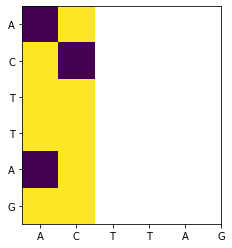

In [77]:
#Final product 
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    xt = plt.xticks(np.arange(len(list(seq1))),list(seq1)) #arange returns evenly spaced values in a given interval
    yt = plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

dotplotx(seq1,seq2)

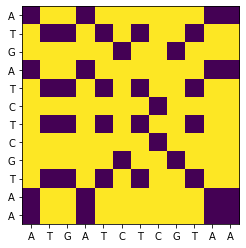

In [82]:
#Using dotplot on DNA

dna1 = Seq("ATGATCTCGTAA")
dna2 = Seq("ATTATGTCGTAA")

dotplotx(dna1,dna2)

# 8) Working with Biological Data File Formats

In [2]:
from Bio import SeqIO

## FASTA

In [19]:
#Load FASTA format of SARS COVID 19 GENOME
for record in SeqIO.parse("Sars Covid Sequence.fasta","fasta"):
    print(record.id)
    print(record.description)
    #print(record.seq) - very long 

MN908947.3
MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome


In [11]:
#Read FASTA condensed sequence
fasta_dna_record = SeqIO.read("SARS covid sequence.fasta","fasta")
dna_sequence = fasta_dna_record.seq
dna_sequence

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

## Genbank

In [21]:
#Load Genbank format of SARS COVID 19 GENOME
for record in SeqIO.parse("SARS covid sequence.gb","genbank"):
    print(record.id)
    print(record.description)

MN908947.3
Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome


In [20]:
#Read Genbank condensed sequence
gb_dna_record = SeqIO.read("SARS covid sequence.fasta","fasta")
dna_sequence = gb_dna_record.seq
dna_sequence

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

# 9) Working with 3D structures

In [22]:
from Bio.PDB import PDBParser, MMCIFParser

## PDB Files

In [25]:
# Creating Parser
parser = PDBParser()
structure = parser.get_structure("SARS covid sequence","SARS covid sequence.pdb")

C:\Users\18687\AppData\Local\Programs\Python\Python39\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2837.
  warnings.warn(


In [26]:
structure #id = <Structure id=SARS covid sequence>

<Structure id=SARS covid sequence>

In [28]:
#No. Models in the structure = 1
len(structure)

#Model
model = structure[0]

In [35]:
#FORMAT: Structure -> Model -> Chain ->Residue -> Atom

#Check for chains
for chain in model:
    print(f"Chain {chain}, Chain_ID {chain.id}")

#Check for residue
for chain in model:
    for residue in chain:
        pass
        #print(residue) - a lot 

#Check for atoms
for chain in model:
    for residue in chain:
        for atom in residue:
            pass
            #print(atom) - a lot
        

Chain <Chain id=A>, Chain_ID A
Chain <Chain id=C>, Chain_ID C


# 10) Visualizing 3D structures

## Py3Dmol

In [36]:
import py3Dmol 

In [40]:
#py3Dmol.view(query = "type:ID")
view1 = py3Dmol.view(query = "pdb:6LU7") #Specify ID from website, not download

view1.setStyle({'cartoon': {'color':'spectrum'}})

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Nglview - shows atom location and tertiary structure

In [43]:
import nglview as nv
!jupyter-nbextension enable nglview --py --sys-prefix

Enabling notebook extension nglview-js-widgets/extension...
      - Validating: ok


In [47]:
#nv.demo()

In [46]:
view2 = nv.show_biopython(structure)
view2

#Static image
#view2.render_image()

NGLWidget()

## pytraj

In [50]:
#import pytraj as pt
# ncov_traj = pt.load("6LU7.pdb")
# view3 = nv.show_pytraj(ncov_traj)
# view3

# 11) BLAST
can be used online or locally with a blast CLI or BioPython

In [53]:
from Bio.Blast import NCBIWWW

In [55]:
#NOT RUN because the result will be LOST

# result_handle = NCBIWWW.qblast("blastn","nt","SARS covid sequence.fasta")

# #result_handle is a generator so we have to loop through it to obtain results
# for i in result_handle:
#     print(i)

In [58]:
#Best option working with BLAST 

with NCBIWWW.qblast("blastn","nt","SARS covid sequence.fasta") as result_handle:
    with open(r"result_blast_covid.xml","w") as xml_file:
        xml_file.write(result_handle)
